In [1]:
import tensorflow as tf

In [2]:
!wget --no-check-certificate \
  https://github.com/dicodingacademy/assets/raw/main/ml_pemula_academy/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2023-08-17 13:33:03--  https://github.com/dicodingacademy/assets/raw/main/ml_pemula_academy/messy-vs-clean-room.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pemula_academy/messy-vs-clean-room.zip [following]
--2023-08-17 13:33:04--  https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pemula_academy/messy-vs-clean-room.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M  --.-KB/s    in 0.1s    

2023-08-17 13:33:04 

In [3]:
# melakukan ekstraksi pada file zip
import zipfile, os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [6]:
os.listdir('/tmp/images/train')

['messy', 'clean']

In [7]:
os.listdir('/tmp/images/val')

['messy', 'clean']

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

validation_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 4,
    class_mode = 'binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size = 4,
    class_mode = 'binary'
)

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [12]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.optimizers.Adam(),
    metrics = ['accuracy']
)

In [13]:
model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 25,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose = 1
)

Epoch 1/25
25/25 [==============================] - 9s 300ms/step - loss: 0.8171 - accuracy: 0.4500 - val_loss: 0.6252 - val_accuracy: 0.5500
Epoch 2/25
25/25 [==============================] - 7s 298ms/step - loss: 0.6293 - accuracy: 0.6700 - val_loss: 0.5736 - val_accuracy: 0.8000
Epoch 3/25
25/25 [==============================] - 8s 298ms/step - loss: 0.6476 - accuracy: 0.7000 - val_loss: 0.6366 - val_accuracy: 0.6500
Epoch 4/25
25/25 [==============================] - 8s 322ms/step - loss: 0.7379 - accuracy: 0.6700 - val_loss: 0.6069 - val_accuracy: 0.7500
Epoch 5/25
25/25 [==============================] - 8s 314ms/step - loss: 0.6096 - accuracy: 0.7400 - val_loss: 0.5311 - val_accuracy: 0.7500
Epoch 6/25
25/25 [==============================] - 8s 317ms/step - loss: 0.5707 - accuracy: 0.6900 - val_loss: 0.5190 - val_accuracy: 0.7000
Epoch 7/25
25/25 [==============================] - 7s 294ms/step - loss: 0.7027 - accuracy: 0.6100 - val_loss: 0.6607 - val_accuracy: 0.5500
Epoch 

Saving kamar.jpg to kamar.jpg
1/1 [==============================] - 0s 134ms/step
kamar.jpg
clean


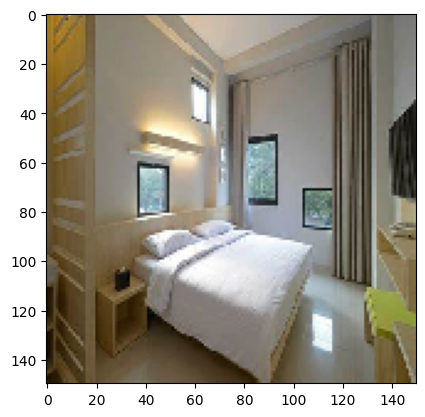

In [14]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes==1:
   print('messy')
  else:
   print('clean')